<a href="https://colab.research.google.com/github/ShoaibFarooqui/Face-Classification/blob/Shoaib/face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Classification
40 sample demonstration identifying Individuals using a Recurrent Neural Network

## Reference
 F. Samaria and A. Harter 
  "Parameterisation of a stochastic model for human face identification"
  2nd IEEE Workshop on Applications of Computer Vision
  December 1994, Sarasota (Florida).

In [26]:
# Data Import
import zipfile
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
np.random.seed(1)

# Machine Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
tf.config.run_functions_eagerly(True)

# Model Visualization
%matplotlib inline
from IPython.display import Image as img
from IPython.display import SVG

In [3]:
# compressed file extraction after zip import
zip_path = '/content/data.zip'
extract_path = '/content/extracted_files/'
with zipfile.ZipFile(zip_path, 'r') as zip:
  zip.extractall(extract_path)

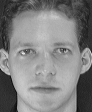

(92, 112)


In [4]:
# sample image display
face_sample = Image.open('/content/extracted_files/data/s1/1.pgm')
display(face_sample)
print(f'{face_sample.size}')

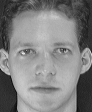

In [5]:
# convert to color
face_sample.save('pngTest.png')
display(face_sample)

In [6]:
# def function that opens a given sample (s# folder)
def sample_collect(sample_directory):
  pgm_images = []
  for pgm_image in os.scandir(sample_directory):
    if pgm_image.name.endswith('.pgm'):
      pgm_images.append(pgm_image.path)
  
  # for image_file in pgm_images:
  #   Image.open(image_file).show()
  
  return pgm_images

In [7]:
# demo sample_col() function
sample_collect('/content/extracted_files/data/s6')  

['/content/extracted_files/data/s6/6.pgm',
 '/content/extracted_files/data/s6/7.pgm',
 '/content/extracted_files/data/s6/3.pgm',
 '/content/extracted_files/data/s6/8.pgm',
 '/content/extracted_files/data/s6/9.pgm',
 '/content/extracted_files/data/s6/10.pgm',
 '/content/extracted_files/data/s6/5.pgm',
 '/content/extracted_files/data/s6/2.pgm',
 '/content/extracted_files/data/s6/4.pgm',
 '/content/extracted_files/data/s6/1.pgm']

In [8]:
# collect all images
all_images = {}

s_folder = np.arange(1,41,1)
for i in s_folder:
  s_folder_path = f'/content/extracted_files/data/s{i}'
  sample_image_list = sample_collect(s_folder_path)
  all_images[i] = sample_image_list


In [9]:
# convert all_images dictionary to dataframe 'df_combined'
dfs = []
for key, values in all_images.items():
  dframe = pd.DataFrame({'Person ID (labels)': key, 'Image Path (features)': values})
  dfs.append(dframe)
df = pd.concat(dfs, ignore_index=True)
df

,Person ID (labels),Image Path (features)
0,1,/content/extracted_files/data/s1/6.pgm
1,1,/content/extracted_files/data/s1/7.pgm
2,1,/content/extracted_files/data/s1/3.pgm
3,1,/content/extracted_files/data/s1/8.pgm
4,1,/content/extracted_files/data/s1/9.pgm
...,...,...
395,40,/content/extracted_files/data/s40/10.pgm
396,40,/content/extracted_files/data/s40/5.pgm
397,40,/content/extracted_files/data/s40/2.pgm
398,40,/content/extracted_files/data/s40/4.pgm


In [10]:
# find smallest image
res=[]

for i in df['Image Path (features)']:
  resolution = Image.open(i).size
  res.append(resolution)

unique_res = set(res)
print(unique_res)

{(92, 112)}


...all the images are already the same size

## Lossless compression Function compressData() to one dimensional array of normalized greyscale

In [11]:
# Iterate over every photo for pixel array
def compressData(List_of_Dir):

  one_dimensional_array_list = []
  image_size = (92, 112)

  for photo_path in List_of_Dir:
    image = Image.open(photo_path)
    pixel_arr = np.array(image)

      # normalization
    pixel_arr = pixel_arr / 255.0

    # Flatten to one dimension
    pixel_count = pixel_arr.shape[0] * pixel_arr.shape[1]
    pixel_arr = pixel_arr.reshape(pixel_count)
    one_dimensional_array_list.append(pixel_arr)
  
  data_prep = np.array(one_dimensional_array_list)
  return data_prep


In [12]:
# Split test and train image paths
X = compressData(df["Image Path (features)"])
y = df['Person ID (labels)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

def model_data():
  print(f'''
    Training Data Info:

    Training Dataset
    Features Data Shape: {X_train.shape}
    Labels Data Shape: {y_train.shape}

    Test Dataset
    Features Data Shape: {X_test.shape}
    Labels Data Shape: {y_test.shape}
  ''')

model_data()


    Training Data Info:

    Training Dataset
    Features Data Shape: (300, 10304)
    Labels Data Shape: (300,)

    Test Dataset
    Features Data Shape: (100, 10304)
    Labels Data Shape: (100,)
  


## One Hot Encoding Labels

In [13]:
x = np.array([[1,2,3],[4,5,6]])

print(f'{x.shape}')

print(x)

print(f'{[row[1] for row in x]}')

(2, 3)
[[1 2 3]
 [4 5 6]]
[2, 5]


In [14]:
labels = np.unique(y_train)
print(y_train.shape)
print(labels)
len([label for label in labels])

(300,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


40

### Hot Encoding with to_categorical()
#### Why `y_train - 1`?

The `num_classes` argument specifies 40 classes but `y_train` indices on unique labels is listed from `0` to `39`. Not `1` to `40`

In [15]:
# Restructuring Labels for target array (300, 40) with 40 classes
y_train_cat = to_categorical(y_train-1, num_classes=40)
y_train_cat.shape

(300, 40)

In [16]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Creating the Model



In [17]:
model = Sequential()

In [18]:
# First hidden layer
model.add(Dense(100, activation='relu', input_dim=10304))

In [19]:
# Second hidden layer
model.add(Dense(100, activation='relu'))

In [20]:
# Output layer
model.add(Dense(40, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1030500   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 40)                4040      
                                                                 
Total params: 1,044,640
Trainable params: 1,044,640
Non-trainable params: 0
_________________________________________________________________


## Compile and Train Our Model

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(
    X_train,
    y_train_cat,
    epochs=50,
    shuffle=True,
    verbose=2
)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


10/10 - 1s - loss: 4.6707 - accuracy: 0.0200 - 788ms/epoch - 79ms/step
Epoch 2/50
10/10 - 1s - loss: 3.6915 - accuracy: 0.0500 - 606ms/epoch - 61ms/step
Epoch 3/50
10/10 - 1s - loss: 3.5690 - accuracy: 0.0767 - 577ms/epoch - 58ms/step
Epoch 4/50
10/10 - 1s - loss: 3.4369 - accuracy: 0.1100 - 576ms/epoch - 58ms/step
Epoch 5/50
10/10 - 1s - loss: 3.3418 - accuracy: 0.1200 - 611ms/epoch - 61ms/step
Epoch 6/50
10/10 - 1s - loss: 3.1529 - accuracy: 0.2033 - 556ms/epoch - 56ms/step
Epoch 7/50
10/10 - 1s - loss: 2.9806 - accuracy: 0.2133 - 597ms/epoch - 60ms/step
Epoch 8/50
10/10 - 1s - loss: 2.8521 - accuracy: 0.2400 - 594ms/epoch - 59ms/step
Epoch 9/50
10/10 - 1s - loss: 2.6701 - accuracy: 0.2667 - 564ms/epoch - 56ms/step
Epoch 10/50
10/10 - 1s - loss: 2.4326 - accuracy: 0.3333 - 585ms/epoch - 59ms/step
Epoch 11/50
10/10 - 1s - loss: 2.3522 - accuracy: 0.2733 - 607ms/epoch - 61ms/step
Epoch 12/50
10/10 - 1s - loss: 2.1371 - accuracy: 0.3667 - 780ms/epoch - 78ms/step
Epoch 13/50
10/10 - 1s -

In [28]:
model.save("face_trained.h5")

In [29]:
model = load_model("face_trained.h5")

In [30]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'''
  Loss: {model_loss}
  Acc: {model_accuracy}
''')

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: ignored